In [1]:
import numpy as np
from scipy.integrate import simpson as simps
import matplotlib.pyplot as plt  
import scipy.constants as cst
from IPython.display import display, Math

## Case of the Sun

In [2]:
SUN_model = np.genfromtxt('Sun_profile', comments = '#') # Everything is in SI (https://users-phys.au.dk/jcd/solar_models/)

#Christensen-Dalsgaard, J., Däppen, W., Ajukov, S. V., Anderson, E. R., Antia, H. M., Basu, S., Baturin, V. A., Berthomieu, G., Chaboyer, B., Chitre, S. M., Cox, A. N., Demarque, P., Donatowicz, J., Dziembowski, W. A., Gabriel, M., Gough, D. O., Guenther, D. B., Guzik, J. A., Harvey, J. W., Hill, F., Houdek, G., Iglesias, C. A., Kosovichev, A. G., Leibacher, J. W., Morel, P., Proffitt, C. R., Provost, J., Reiter, J., Rhodes Jr., E. J., Rogers, F. J., Roxburgh, I. W., Thompson, M. J., Ulrich, R. K., 1996.
#The current state of solar modeling.
#Science, 272, 1286 - 1292. 

In [4]:
PSUN_center_bar = 2.477e11 # (bar) https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html (hereafter referred to as 'NASA')
rhoSUN_center = 1.622e5 # kg/m^3 https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

barTOpascal = 1e5

PSUN_center = PSUN_center_bar * barTOpascal # pascal

print(f'For the sun, at the center, the ratio between the pressure and density is {PSUN_center / (rhoSUN_center*cst.c**2)}')

For the sun, at the center, the ratio between the pressure and density is 1.699157946266839e-06


In [5]:
SUN_radius = 695700*1e3 # m https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
# Density
Density_SUN = SUN_model[:,2] * 1e-3 / (1e-2)**3 # kg/m^3
# Pressure
Pressure_SUN = SUN_model[:,3] / 10 # pascal (bc, given in dyn/cm^2)
# Radius of the Sun
Radius_SUN =  SUN_model[:,0] * SUN_radius

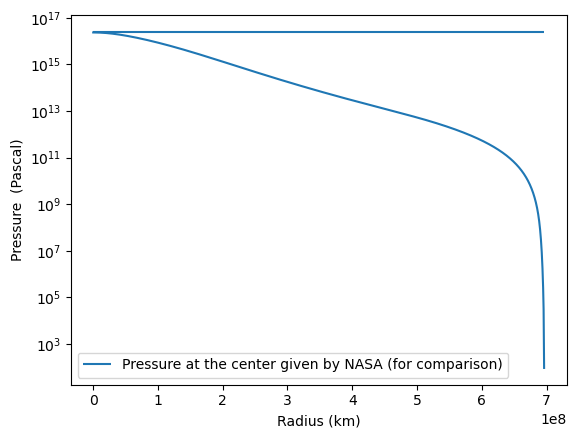

In [6]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Pressure_SUN) 
ax.hlines(y = PSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Pressure at the center given by NASA (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Pressure  (Pascal)')
plt.legend()
plt.show()

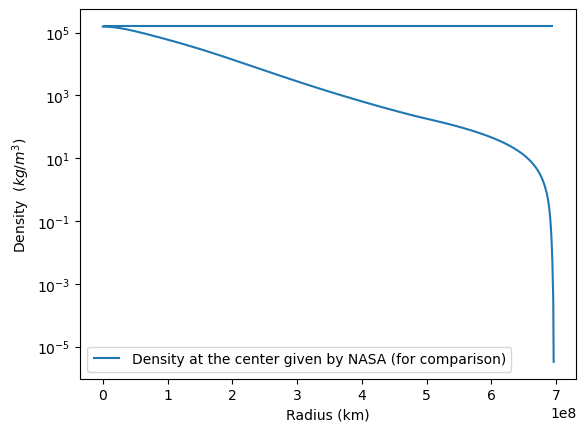

In [7]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Density_SUN) 
ax.hlines(y = rhoSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Density at the center given by NASA (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Density  ($kg/m^3$)')
plt.legend()
plt.show()

## Computation of phi

In [8]:
solar_radius = Radius_SUN[0]

In [9]:
phi_0 = 1
alpha = 16 * np.pi * phi_0/cst.c**4
delta_omega = cst.G * simps(Pressure_SUN*Radius_SUN**2/solar_radius,-Radius_SUN) #pq mettre un moins ? 
phi = alpha * delta_omega
#print(phi)

In [10]:
omega = 4 * np.pi * cst.G *simps(Density_SUN * Radius_SUN**2/solar_radius)
#print(omega)

In [11]:
kappa_tilde = 8 * np.pi * cst.G/cst.c**4
Pressure_SUN_phi_radius = Pressure_SUN * np.sqrt(phi_0) * Radius_SUN**2
#p_star = kappa_tilde/6 * ( simps(Pressure_SUN_phi_radius, -Radius_SUN) + simps(Pressure_SUN_phi_radius * phi/2, -Radius_SUN) + simps(Pressure_SUN_phi_radius * 2 * omega/cst.c**2,-Radius_SUN) + simps(Pressure_SUN_phi_radius * phi * omega /cst.c**2, -Radius_SUN) )
p_star = kappa_tilde/6 * ( simps(Pressure_SUN_phi_radius, -Radius_SUN) + simps(Pressure_SUN_phi_radius * 2 * omega/cst.c**2,-Radius_SUN) )#+o(c-4)

In [12]:
Density_SUN_phi_radius = Density_SUN * np.sqrt(phi_0) * Radius_SUN**2
#E_star = kappa_tilde/6 * ( simps(Density_SUN_phi_radius, -Radius_SUN) + simps(Density_SUN_phi_radius * phi/2, -Radius_SUN) + simps(Density_SUN_phi_radius * 2 * omega/cst.c**2,-Radius_SUN) + simps(Density_SUN_phi_radius * phi * omega /cst.c**2, -Radius_SUN) )
E_star = kappa_tilde/6 * ( simps(Density_SUN_phi_radius, -Radius_SUN) + simps(Density_SUN_phi_radius * 2 * omega/cst.c**2,-Radius_SUN) ) #+o(c-4)
#print(E_star)

In [13]:
theta = 3 * p_star/(E_star*cst.c**2)

## Evaluation of gamma_sun

In [14]:
gamma = (1+2 *theta+1/2)/(2+theta-1/2)
display(Math(r"\gamma - 1 = {:.0e}".format(gamma - 1)))

<IPython.core.display.Math object>

## Case of the Earth

In [15]:
PREM_model = np.genfromtxt('densite_pression', comments = '#') # Everything is in SI
#Data provided by Yanick Ricard from the ENS Lyon, but is also available at https://ds.iris.edu/ds/products/emc-prem/

In [16]:
# Density
Density = PREM_model[:,1]
# Pressure
Pressure = PREM_model[:,2][-1]- PREM_model[:,2]
# Radius of the Earth
Earth_radius  = PREM_model[:,0][-1]
Radius_earth = PREM_model[:,0] 

In [17]:
dr = PREM_model[:,0][1]-PREM_model[:,0][0]

In [18]:
delta_omega_earth = cst.G * simps(Pressure*Radius_earth**2/Earth_radius,dx=dr) #pq mettre un moins ? 
phi_earth = alpha * delta_omega_earth
#print(phi_earth)

In [19]:
omega_earth = 4 * np.pi * cst.G *simps(Density * Radius_earth**2/Earth_radius, dx=dr)
#print(omega_earth)

In [20]:
Pressure_EARTH_phi_radius = Pressure * np.sqrt(phi_0) * Radius_earth**2
p_earth = kappa_tilde/6 * ( simps(Pressure_EARTH_phi_radius, dx=dr) + simps(Pressure_EARTH_phi_radius * 2 * omega_earth/cst.c**2,dx=dr))#+o(c-4)
#print(p_earth)

In [21]:
Density_EARTH_phi_radius = Density * np.sqrt(phi_0) * Radius_earth**2
E_earth = kappa_tilde/6 * ( simps(Density_EARTH_phi_radius, dx=dr) + simps(Density_EARTH_phi_radius * 2 * omega_earth/cst.c**2,dx=dr) )#+o(c-4)
#print(E_earth)

In [22]:
theta_earth = 3 * p_earth/(E_earth*cst.c**2)

## Evaluation of gamma earth

In [23]:
gamma_earth = (1+2 *theta_earth+1/2)/(2+theta_earth-1/2)
#print(gamma_earth-1)

In [24]:
#print(f'$\gamma$-1 = {gamma_earth-1:.0e}')
display(Math(r"\gamma - 1 = {:.0e}".format(gamma_earth - 1)))

<IPython.core.display.Math object>